# Import

In [7]:
import matplotlib.pyplot as plt
import torch

from tests import sr_simple_multi_loss_test
from utils import misc_utils, viz_utils

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

# Create Test Case

In [16]:
test = sr_simple_multi_loss_test.SRSimpleMultiLossTest(use_gpu=False)

# Prepare Dataset

In [17]:
test.create_data_loaders()

# Visualize Dataset

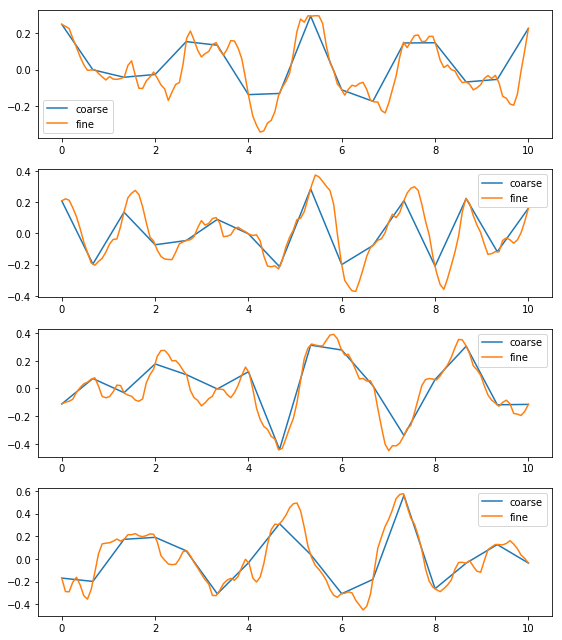

In [18]:
test.visualize_single_batch()

# Create Model

In [19]:
test.create_model()
print(test.model)
print('\nNum params: ' + str(misc_utils.get_num_parameters(test.model)))

SRSimple (
  (main): Sequential (
    (0): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ResidualModule (
      (main): Sequential (
        (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True)
        (2): LeakyReLU (0.2)
        (3): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
        (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True)
      )
    )
    (2): ResidualModule (
      (main): Sequential (
        (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True)
        (2): LeakyReLU (0.2)
        (3): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
        (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True)
      )
    )
    (3): ResidualModule (
      (main): Sequential (
        (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): BatchNo

# Create Loss Function

In [20]:
test.create_loss_function()

# Create Optimizer

In [21]:
test.create_optimizer()

# Train

epoch:1, train_loss:8.48435, val_loss:5.3376
	freq:8.17629, arc:0.122066, pos:0.185989
epoch:2, train_loss:4.45948, val_loss:4.7541
	freq:4.31229, arc:0.0326726, pos:0.114518
epoch:3, train_loss:4.34065, val_loss:4.5576
	freq:4.1973, arc:0.0317898, pos:0.111568
epoch:4, train_loss:4.23566, val_loss:4.65282
	freq:4.09383, arc:0.0307167, pos:0.111118
epoch:5, train_loss:4.24484, val_loss:4.53761
	freq:4.1039, arc:0.0303277, pos:0.11061
epoch:6, train_loss:4.14152, val_loss:4.50546
	freq:4.00101, arc:0.0299877, pos:0.110523
epoch:7, train_loss:4.15743, val_loss:4.50922
	freq:4.01883, arc:0.0294858, pos:0.109113
epoch:8, train_loss:4.10188, val_loss:4.44995
	freq:3.96327, arc:0.0298087, pos:0.108794
epoch:9, train_loss:4.12864, val_loss:4.51825
	freq:3.98997, arc:0.0294134, pos:0.109255
epoch:10, train_loss:4.1357, val_loss:4.48914
	freq:3.99831, arc:0.0292264, pos:0.108157


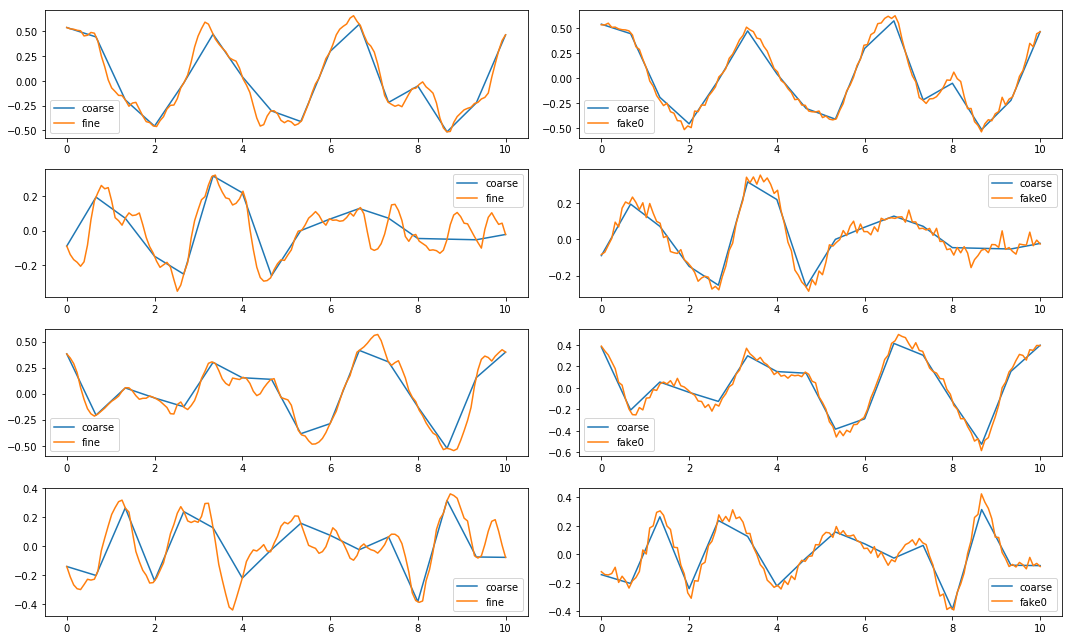

epoch:11, train_loss:4.09865, val_loss:4.44916
	freq:3.9613, arc:0.0292039, pos:0.108147
epoch:12, train_loss:3.99224, val_loss:4.48553
	freq:3.85557, arc:0.0291508, pos:0.10752
epoch:13, train_loss:4.02183, val_loss:4.44888
	freq:3.88546, arc:0.0292009, pos:0.107172
epoch:14, train_loss:3.97816, val_loss:4.5086
	freq:3.84301, arc:0.0286476, pos:0.106499
epoch:15, train_loss:4.0116, val_loss:4.58179
	freq:3.8764, arc:0.0287315, pos:0.106474
epoch:16, train_loss:3.94273, val_loss:4.499
	freq:3.80817, arc:0.0283199, pos:0.10624
epoch:17, train_loss:3.93591, val_loss:4.4841
	freq:3.80122, arc:0.0285646, pos:0.106123
epoch:18, train_loss:3.93468, val_loss:4.51336
	freq:3.80138, arc:0.0279253, pos:0.105375
epoch:19, train_loss:3.91214, val_loss:4.50415
	freq:3.77812, arc:0.0283116, pos:0.105706
epoch:20, train_loss:3.93938, val_loss:4.54207
	freq:3.80503, arc:0.0283937, pos:0.105952


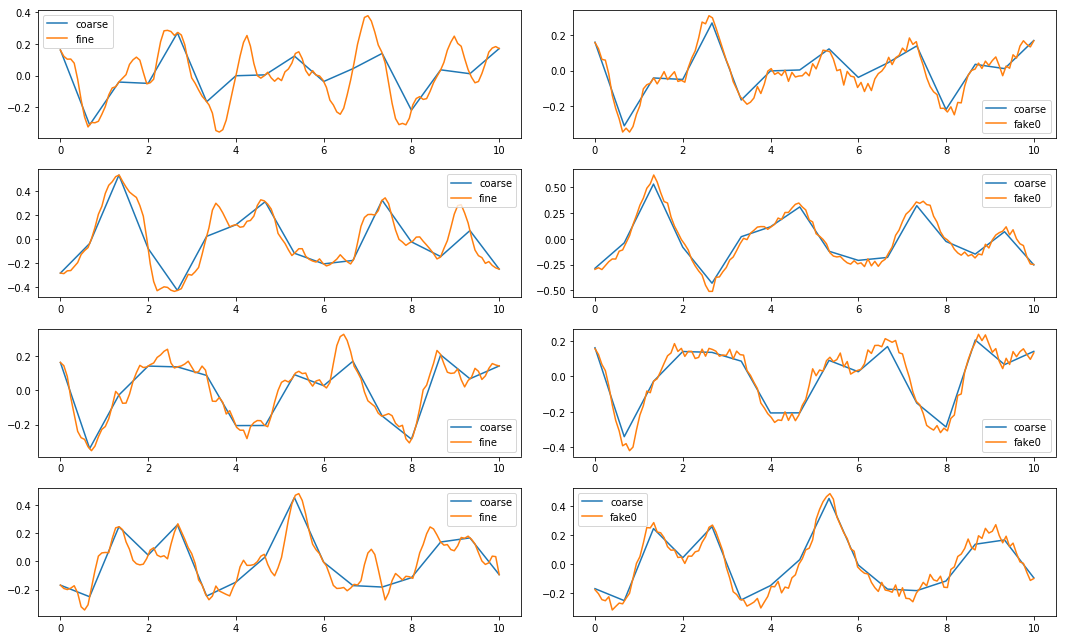

In [22]:
kwargs = {}
kwargs["visualize_every_n_epoch"] = 10
test.train_model(num_epochs=20, **kwargs)

# Save Model

## Checkpoint name

In [23]:
checkpoint_name='checkpoint.tar'

## Save model

In [24]:
torch.save(test.log,checkpoint_name)

## Load model

In [25]:
log=torch.load(checkpoint_name)
model=log['best_model']
test.model = model

# Test Model

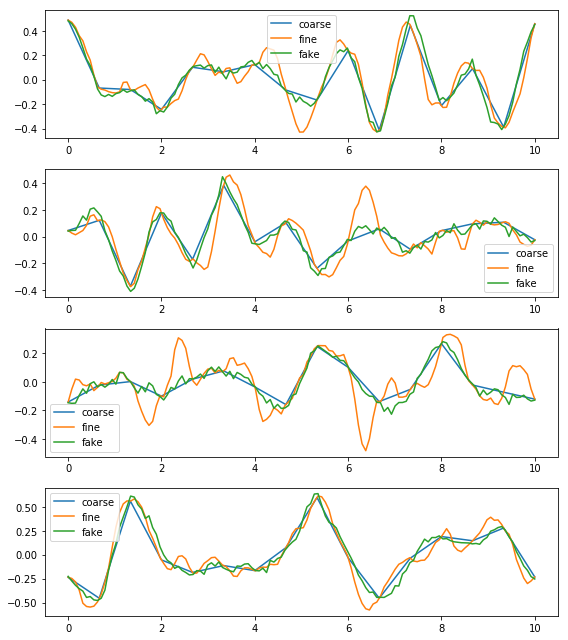

In [26]:
test.test_model()

# Show Loss

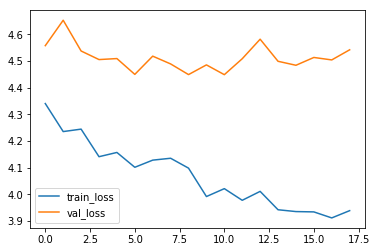

In [27]:
plt.plot(log['train_loss'][2:],label='train_loss')
plt.plot(log['val_loss'][2:],label='val_loss')
plt.legend()
plt.show()